In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('train.csv')
df.shape

(100000, 12)

Данные по размеру совпадают с описанием данных.
Посмотрим тип данных

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Есть ли дубликаты по ID пассажира

In [7]:
df.PassengerId.value_counts()

0        1
66650    1
66672    1
66671    1
66670    1
        ..
33331    1
33330    1
33329    1
33328    1
99999    1
Name: PassengerId, Length: 100000, dtype: int64

Видим, что дубликатов нет, все значения уникальны.
Есть ли пропущенные значения и сколько их

In [8]:
a = df.isna().sum()/100000
a

PassengerId    0.00000
Survived       0.00000
Pclass         0.00000
Name           0.00000
Sex            0.00000
Age            0.03292
SibSp          0.00000
Parch          0.00000
Ticket         0.04623
Fare           0.00134
Cabin          0.67866
Embarked       0.00250
dtype: float64

Базовые статистики

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Можем увидеть основные показатели.
Далее посмотрим значение основных категориальных переменных

In [10]:
df.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [11]:
df.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

In [12]:
df.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

In [13]:
df.Cabin.value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

In [14]:
df.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

Посмотрим кореляцию переменных

<AxesSubplot:>

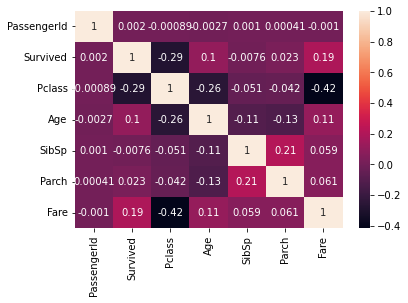

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

Сколько человек выжило

In [16]:
df.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

У кого больше шанс выжить? Посмотрим зависимость выживаемости от других параметров(возраст, пол, посадка)

In [17]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           31226
        0           12660
male    0           44566
        1           11548
Name: Survived, dtype: int64

In [18]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

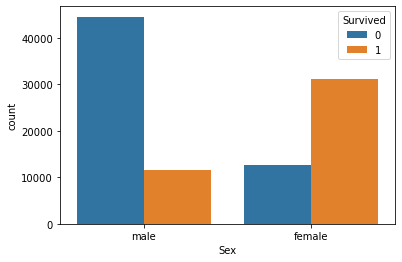

In [19]:
sns.countplot(x = 'Sex', data = df, hue = 'Survived')

In [20]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           17576
        0           12739
2       1           15057
        0           13622
3       0           30865
        1           10141
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

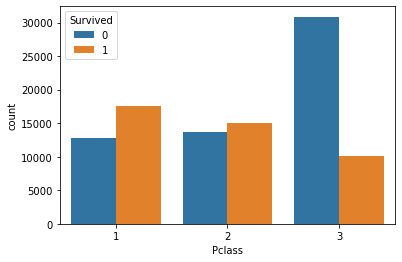

In [21]:
sns.countplot(x = 'Pclass', data = df, hue = 'Survived')

Как мы видим выживших из третьего класса меньше значительно, чем с первого и второго

Также выживших мужчин намного меньше. На шлюпки сажали сначала женщин, потом мужчин.

<AxesSubplot:xlabel='Age', ylabel='count'>

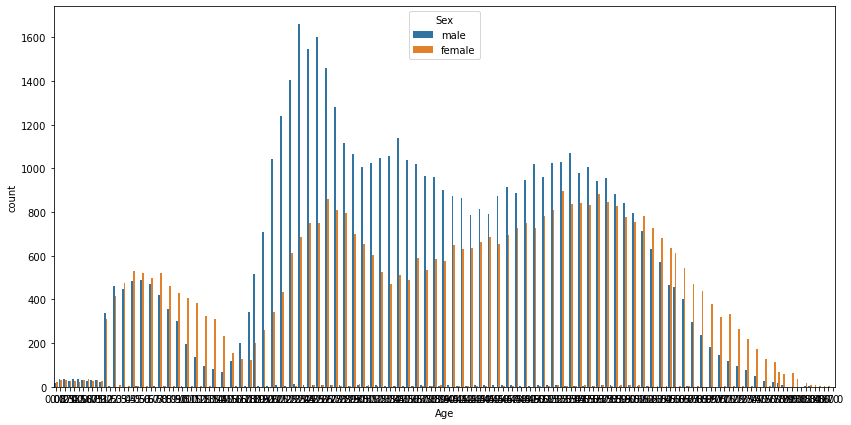

In [22]:
plt.figure(figsize=(14,7))
sns.countplot(x = 'Age', data = df, hue = 'Sex')

Посмотрим зависимость выживаемости от родственных связей

<AxesSubplot:xlabel='SibSp', ylabel='count'>

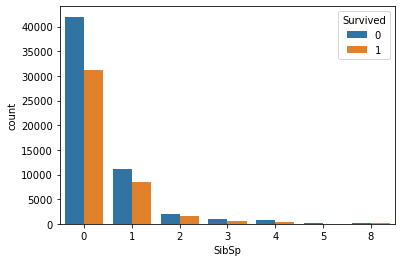

In [23]:
sns.countplot(x = 'SibSp', data = df, hue = 'Survived')

In [24]:
df.groupby('SibSp')['Survived'].value_counts()

SibSp  Survived
0      0           42017
       1           31291
1      0           11188
       1            8570
2      0            2022
       1            1681
3      0             981
       1             654
4      0             729
       1             439
5      0             107
       1              25
8      0             182
       1             114
Name: Survived, dtype: int64

In [25]:
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.426843
1    0.433748
2    0.453956
3    0.400000
4    0.375856
5    0.189394
8    0.385135
Name: Survived, dtype: float64

In [26]:
df.groupby('Parch')['Survived'].value_counts()

Parch  Survived
0      0           43741
       1           29799
1      1            7694
       0            5302
2      0            6913
       1            4323
3      0             499
       1             484
4      0             319
       1             127
5      1             189
       0             142
6      0             162
       1              42
9      0             148
       1             116
Name: Survived, dtype: int64

In [27]:
df.groupby('Parch')['Survived'].mean()

Parch
0    0.405208
1    0.592028
2    0.384745
3    0.492370
4    0.284753
5    0.570997
6    0.205882
9    0.439394
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch', ylabel='count'>

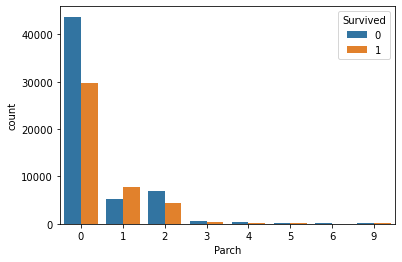

In [28]:
sns.countplot(x = 'Parch', data = df, hue = 'Survived')

In [29]:
df.groupby('Parch')['SibSp'].mean()

Parch
0    0.246410
1    0.813635
2    0.879227
3    0.663276
4    0.338565
5    0.456193
6    0.446078
9    0.568182
Name: SibSp, dtype: float64

In [30]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    92.653113
2    25.756003
3    20.618226
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

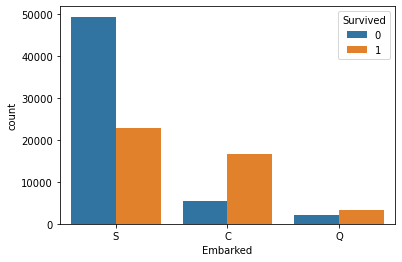

In [31]:
sns.countplot(x = 'Embarked', data = df, hue = 'Survived')

In [32]:
df.groupby('Embarked')['Fare'].mean()

Embarked
C    71.549073
Q    73.385148
S    33.200008
Name: Fare, dtype: float64

Сделав первичный анализ данного DataFrame выявил следующее:
 - Вероятность выживания женщин намного выше, чем у мужчин
 - Вероятность выживания у пассажиров первого и второго класса также была выше, чем у пассажиров третьего класса